In [1]:
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib notebook # uncomment this line if you wish to save a configuration

## Task 1:
We first define some functions to help us structure the code a bit.

In [2]:
def grid_step(grid, grid_next, size, N, e):
    '''
    This function takes a grid, a temp array grid_next
    and steps the grid forward one step 
    according to the neighbourhood and 
    update functions as defined.
    Since creating new arrays is expensive,
    we pass the temporary grid_next array as well
    '''
    n, m = size # unroll vector 
    
    # we use a new matrix since we cant update 
    # in place, since that would
    # change how the next neighbourhoods are updated
    for i in range(n):
        for j in range(m):
            neighbourhood = get_neighbourhood(grid, size, index=(i, j))
            grid_next[i][j] = update_element(grid[i][j], neighbourhood, N, e)
    grid = np.copy(grid_next)
    return grid

def update_element(element, neighbourhood, N, e):
    '''
    This function updates an element given its neighbourhood
    '''
    # on average this will probably be true more often than the other case, 
    # so we check the last rule first
    if element == 0:
        # if at least one neighbor is in an excited state,
        # we will have a sum greater than 0, and thus return 1*True(1) = 1, 
        # otherwise we return 1 * False(0) = 0
        
        # TODO: consider changing to some threshold  
        for i in range(len(neighbourhood)):
            if 1 <= neighbourhood.any() <= e:
                return 1
        return 0
    
    else:
        # returns element + 1 mod N
        return (element + 1) % N
    
def get_neighbourhood(grid, size, index):
    '''
    This function returns a neighbourhood of a cell given a 
    neighbourhood type
    '''
    i, j = index # unroll index
    n, m = size
    # we use a 1d array because 
    # we do not care about the positions of the 
    # individual neighbours
    
    neighbourhood = np.zeros(4)
    
    # negative indices will wrap around by default, and
    # for positive indices we simply take 
    # index mod axis to wrap around
    neighbourhood[0] = grid[i-1][j]    
    # mod n to wrap around
    neighbourhood[1] = grid[(i+1) % n][j]
    neighbourhood[2] = grid[i][j-1]
    # mod m to wrap around
    neighbourhood[3] = grid[i][(j+1) % m]
    return neighbourhood

def simulation_run(size, N, e, num_iterations, seed = -1):
    # initialize our grid
    # ensure we can control our random generator
    
    # if seed is not default, we pass the seed, otherwise seed will be random
    if seed != -1:
        np.random.seed(seed=seed) 
    
    grid = np.random.randint(low=0, high=e+1, size=size) 
    grid_next = np.zeros(shape=size)
    
    grids = [grid]
    # step our grid for num_iterations and save results in a list
    for i in range(num_iterations):
        grid = grid_step(grid, grid_next, size, N, e)
        grids.append(grid)
    return grids

def find_period(grid, size, N, e, num_iterations):
    '''
    This function will compare the next configuration
    to all previous one to check if it matches one, in which
    case we calculate and return the grids and the period
    '''
    # initialize our grid
    # ensure we can control our random generator
     
    grid_next = np.zeros(shape=size)
    
    grids = [grid]
    while True:
        grid = grid_step(grid, grid_next, size, N, e)
        
        k = len(grids)
        if k % 500 == 0:
            print(f'Trying to find period, iteration: {k}')
        for i in range(k):
            if np.array_equal(grid, grids[i]):
                grids.append(grid)
                return grids, (k - i, i, k)
        grids.append(grid)

In [3]:
n = 50
m = 50
size = (n, m)

N = 5
e = 3

# make sure we have valid N, e
assert(e <= N - 2)

num_iterations = 50

seed = 2

grids = simulation_run(size=size, N=N, e=e, num_iterations=num_iterations, seed=seed)

## Task 1 cont:
Note that to save it to a picture, simply uncomment the line in the first cell, and save the picture
using the matplotlib function. To change the iteration, change which index we plot in ax.matshow(grids[50])

The more red an element is, the higher the value.

(-0.5, 49.5, 49.5, -0.5)

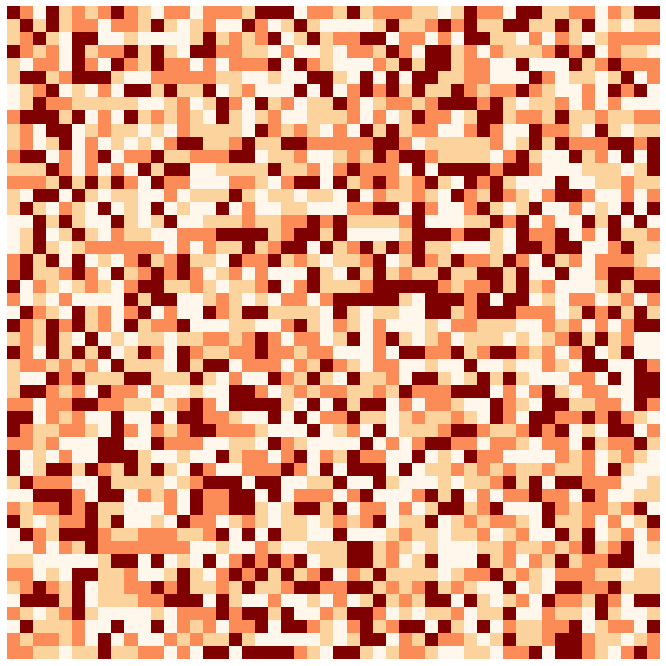

In [4]:
plt.rcParams['image.cmap'] = 'OrRd'
fig, ax = plt.subplots(figsize=(12, 12))

ax.matshow(grids[49]) # change index to change iteration
ax.axis(False)

## Question 2:
Since the initial configuration is random, we do not need to consider whether or not a configuration 
is reachable or not, but instead only the number of possible initial configurations possible.
Since each cell can take on any value between $0$ to $N-1$, and there are a total number of $n \cdot m$
cells we get that there are $(N-1)\cdot n \cdot m$ possible configurations by the multiplication principle (or something)

## Task 3:
Though the code for finding the period is defined above in the functions section, 
we call the function here and find an initial configuration that yields a living period.

The initial configuration defined in "grid" yields a living period of 5, where $N = 5$ $e = 3$. This structure becomes periodic from grid[4] to grid[9], and then repeating. 

This coincides with a period $N=5$ is expected from *theorem 1*

In [5]:
N = 5
e = 3

# make sure we have valid N, e
assert(e <= N - 2)

grid = np.array([
                [0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0], 
                [0, 0, 1, 2, 0, 0], 
                [0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0]])

size = grid.shape
grids, period = find_period(grid, size=size, N=N, e=e, num_iterations=num_iterations)
print(f'period = {period[0]}\ni = {period[1]}\nj = {period[2]}')

period = 5
i = 4
j = 9


Check that we in fact have a period

In [6]:
x = 4
y = 9
period = grids[x] - grids[y]
print(np.array_equal(grids[x], grids[y]))
print(period)

True
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [7]:
print(grids[9])

[[1. 2. 3. 3. 2. 1.]
 [2. 3. 4. 4. 3. 2.]
 [3. 4. 0. 1. 4. 3.]
 [2. 3. 4. 4. 3. 2.]
 [1. 2. 3. 3. 2. 1.]
 [0. 1. 2. 2. 1. 0.]]


## Task 4
We can use our previous example grids[4] for our periodic orbit and we try to change some elements.

In [8]:
# original orbit
print(grids[4])

[[1. 2. 3. 3. 2. 1.]
 [2. 3. 4. 4. 3. 2.]
 [3. 4. 0. 1. 4. 3.]
 [2. 3. 4. 4. 3. 2.]
 [1. 2. 3. 3. 2. 1.]
 [0. 1. 2. 2. 1. 0.]]


Set up an orbit close to our original one (note that here $C_p$ is the changed orbit and $C$ the original one)

In [9]:
C = np.copy(grids[4])
# We change C_p sligtly in a somewhat arbitrary position
C_p = np.copy(C)
C_p[1][2] = 3
print(C_p - C)

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


In [10]:
# and then we check what orbit we get:
N = 5 
e = 3 
assert(e <= N - 2)

size = grid.shape

grids_cp, period_cp = find_period(C_p, size=size, N=N, e=e, num_iterations=num_iterations)
print(f'period = {period_cp[0]}\ni = {period_cp[1]}\nj = {period_cp[2]}')

period = 5
i = 0
j = 5


In [11]:
# Explore difference between the final orbits
print(grids_cp[period_cp[1]] - C)

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


## Task 4 cont.
As we can see, the orbit is slightly different than our original orbit, but interestingly it differs exactly as much as we changed our inital matrix. 
Thus, the original orbit is not exactly attracting in this case, but also not very sensitive to the initial conditions either since we did not see much of a change.

## Task 5
Since we know that the integers modulo N is a group under addition, supposing we have some configuration $C_1$, we can choose a $C_2$ such that $C_1 + C_2 = \mathbf{0}$.

We also note without proof that the zero matrix, $\mathbf{0}$ is addatively neutral here (viz. a zero element) both under <b>GHCA</b> and element wise.


One example for the case N = 5, e = 3 would be $C_1 = \begin{bmatrix}
0 & 0 & 0 &\\
0 & 1 & 0 &\\
0 & 0 & 0 & \end{bmatrix}$ and $C_2 = \begin{bmatrix}
0 & 0 & 0 &\\
0 & 4 & 0 &\\
0 & 0 & 0 & \end{bmatrix}$, where since $1 + 4 \equiv 0 \mod 5$, clearly $F(C_1 + C_2) = F(\mathbf{0}) = \mathbf{0}$

however, $F(C_1) = \begin{bmatrix}
0 & 0 & 0 &\\
0 & 2 & 0 &\\
0 & 0 & 0 & \end{bmatrix}$, and $F(C_2) = \mathbf{0}$


Thus $F(C_1) + F(C_2) = F(C_1) + \mathbf{0} = F(C_1) \neq \mathbf{0}$, a simple counter example. Thus, GHCA is not addative.